In [1]:
#This notebook contains each of the Wichmann and Tsunami catalog
#observation distributions, their reference location and a brief 
#explanation of why we constructed them the way we did

"""
Created By Cody Kesler and Hunter
Property of BYU Mathematics Dept.

** Need to install openpyxl and xlsxwriter **
"""
#import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

import sys
sys.path.append('./Classes')
from Gauge import Gauge, dump_gauges, load_gauges
from ShoreAngle import ShoreAngle
# from buildGaugeLikelihoods import buildGaugeLikelihoods
# from buildGaugeLikelihoods import plotGaugeLikelihoods
%matplotlib inline
gauges = list()

Tidal heights information:

According to the article by Ray, Egbert, and Erofeeva (2005) "A Brief Overview of Tides in the Indonesian Seas", we should be able to use the same tide level everywhere in the Banda Sea (Buru may be the only exception).  There is only one accessible modern tidal gauge in the Banda Sea located at Ambon.  Using the last 20 years of data from this gauge allows for the reconstruction of the historical tide levels.  Relying on the Wolfram Alpha engine, we find that on November 26, 1852 the low tide occurred at 08:08, which from the record would have been shortly after the earthquake and close to the expected arrival time of the first wave at most of the observation points (Saparua & Ambon in particular).  In fact, this low tide was nearly 0.5m below normal low tide.  Also taking data from the Wolfram Alpha engine, we note that the typical gap between low and hight tide in Ambon is 1.1m, with extreme high tide of +1m above the average.  From this we will infer that the first tsunami wave arrived at something close to an extremely low tide which we will infer as -1.05m from mean sea level(-.5m for extreme low tide,a nd typical tidal variation of 0.55m from mean sea level).
This means that in the absence of any other observational information, everything should be shifted +1m (we can't justify accounting for 5cm at this level of accuracy) to account for extreme low tide that morning.  If the observation mentioned the wave penetrating beyond flood tide levels we should shift by 2m (one additional meter to compensate for flood tide levels).

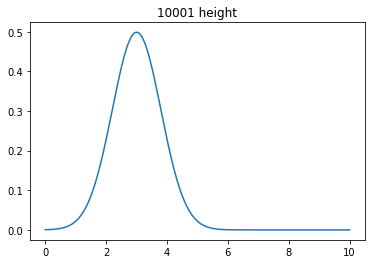

In [2]:
#Pulu Ai - Wichmann
#Pg 148 - "the flood wave reached only a few feet above the usual water level"
#North Shoreline coordinates - [-4.5166, 129.775]
#Another recording pg 243 - "On Ai Island, the sea level was a metre (a few feet) higher than the usual flood tide level"
#indicating more than 1m (the base here is flood tide level)

#from a very low tide to 1m above flood tide levels indicates approximately 3m wave heights




city_name = 'Pulu Ai - Wichmann'
name = 10001 # Pulu Ai - Wichmann
latitude = -4.5175
longitude = 129.775
# distance = 0 # in kilometers (max 5) //TODO Not sure what this is??
# kind = [None, 'norm', None] #we aren't going to extrapolate an arrival time here...

# For kind = 'norm'
# arrival_mean = 20 # in minutes
# arrival_std = 7
# arrival_params = [arrival_mean, arrival_std]
height_mean = 3 # in meters
height_std =  0.8
height_params = [height_mean, height_std]
# inundation_std = None
# inundation_mean = None
# inundation_params = [inundation_mean, inundation_std]

beta = 0
n = .015 # OR .03

dists = dict()
dists['height'] = stats.norm(loc=height_mean,scale=height_std)

gauge = Gauge(name,longitude,latitude,dists,beta,n,city_name)
gauges.append(gauge)
gauge.plot_all()

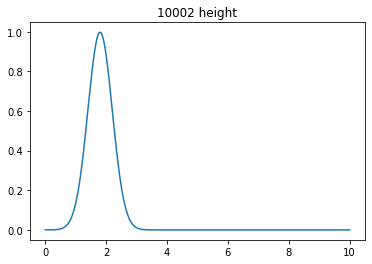

In [3]:
#Ambonia - Wichmann
#Pg 149 "the sea (the low water level climbed to 1.8m, a height that exceeded the 
#highest high water level by 20 cm"

#Port Shore coordinates: [-3.6929, 128.180352] 
#Location here is the shoreline near Fort Victoria which should be the most likely location for the European record
#The Geoclaw gauge will be in the bay, but hopefully will still capture effects of the coastline

#This is hard to determine exactly what the account means.  It appears that the water level in Ambon went from the
#extreme low tide at that time to +1.8m higher, which means we don't need to shift for the tide, so this is what we
#have done.  There may be reason to shift for the tide, but not that I can see


city_name = 'Ambonia - Wichmann'
name = 10002
latitude = -3.691
longitude = 128.178
# distance = 0 # in kilometers (max 5) //TODO Not sure what this is??
# kind = [None, 'norm', None]

# For kind = 'norm'
# arrival_mean = 40  # in minutes
# arrival_std = 15
height_mean = 1.8  # in meters
height_std = 0.4
# arrival_params = [arrival_mean, arrival_std]
height_params = [height_mean, height_std]
# inundation_std = None
# inundation_mean = None
# inundation_params = [inundation_mean, inundation_std]
beta = 0
n = .015

dists = dict()
dists['height'] = stats.norm(loc=height_mean,scale=height_std)

gauge = Gauge(name,longitude,latitude,dists,beta,n,city_name)
gauges.append(gauge)
gauge.plot_all()

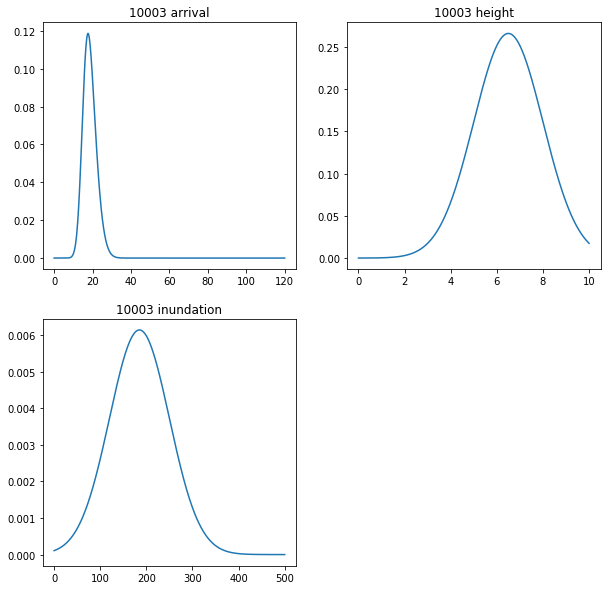

In [4]:
#Banda Neira - Tsunami Catalog
#Pg 242 - "The water rose to the roofs of the storehouses and homes"
#Fort Nassau side dock shore coordinates, just north of the boat dock
#used coordinates to the East of Fort Nassau, so measured distance to the dock on the east side
#Note that right now we are not using the observations on Lonthor, but should add this in later

#Here we assume that the water can't reach even the base of any homes/storehouses until it exceeds the flood tide
#level which would be +2m at least.  Then the water must exceed the height of the storehouses and homes, which
#for the style of homes built at the time would be at least 4-5m which would yield an expected wave height of 6-7m.
#Of course there is a lot of uncertainty in this observation, so the distribution is substantially wider than others.

city_name = 'Banda Neira - Tsunami Catalog'
name = 10003  #
latitude = -4.5248
longitude = 129.8965
distance = 0  # in kilometers (max 5) //TODO Not sure what this is??
kind = ['skewnorm', 'norm', 'norm']
#kind = ['skewnorm','norm',None]#turn off inundation

# For kind = 'norm'
arrival_skew_param = 2
arrival_mean = 15  # in minutes
arrival_std = 5
arrival_params = [arrival_skew_param, arrival_mean, arrival_std]
height_mean = 6.5  # in meters
height_std = 1.5
height_params = [height_mean, height_std]
#inundation_skew_param = 3
inundation_mean = 185  # in meters
inundation_std = 65
inundation_params = [inundation_mean, inundation_std]

# Load the beta angles for the shore elevation for inundation priors for
# BANDA_NEIRA
ShoreAngles = ShoreAngle('south_banda_neira_profiles')
profiles_to_average = [1, 2, 3]
BANDA_NEIRA_average_angle = ShoreAngles.getAveragesSlopeAngles(profiles_to_average)
beta = BANDA_NEIRA_average_angle

n = .06

dists = dict()
dists['arrival'] = stats.skewnorm(a=arrival_skew_param,loc=arrival_mean,scale=arrival_std)
dists['height'] = stats.norm(loc=height_mean,scale=height_std)
dists['inundation'] = stats.norm(loc=inundation_mean,scale=inundation_std)

gauge = Gauge(name,longitude,latitude,dists,beta,n,city_name)
gauges.append(gauge)
gauge.plot_all()

# Neira_1 = stats.norm(height_mean,height_std)
# D_Neira_1 = np.linspace(0,10,1000)
# plt.plot(D_Neira_1, Neira_1.pdf(D_Neira_1))
# plt.xlabel("wave height at the homes (meters)")
# plt.plot()
# plt.show()

# #Banda Neira - Wichmann
# #Pg 148 - "Reached the base of the hill on which Fort
# #Belgica is built on Banda Neira
# #Fort Nassau side dock shore coordinates: [-4.529905, 129.897376]

# domain = np.linspace(0,600,1000)
# distrib = stats.skewnorm.pdf(domain,inundation_skew_param,inundation_mean,inundation_std)
# plt.plot(domain,distrib)
# plt.xlabel("Inundation(meters)")
# plt.show()

# #Banda Neira - Wichmann
# #Pg 144 - 145 - "Barely had the ground
# #been calm for a quarter of an hour when the flood wave crashed in

# #Fort Nassau side dock shore coordinates: [-4.529905, 129.897376]

# mean = 15
# var = 5
# skew = 2

# D_Neira_Time = np.linspace(0,60,1000)
# Neira_Time = stats.skewnorm.pdf(D_Neira_Time, arrival_skew_param,arrival_mean,arrival_std)
# plt.plot(D_Neira_Time, Neira_Time)
# plt.xlabel("arrival time (minutes)")
# plt.show()
# g.plot()

Wave Height Justification: traditional indonesian homes seemed to have very steep vaulted roofs their buildings, with stilts on the bottom, it seemed the height on most was well over 10 feet. I based this assumption off of pictures of lat 19th and early 20th century homes found at https://en.wikipedia.org/wiki/Architecture_of_Indonesia

Inundation Justification: We generated data for this distribution using GIS. We chose an incline of X to be the base of the hill where Fort Belgica is situated. We then measured the distance from 20 random points on the beach to the edge of the hill and took the mean of those measurements as the mean of the distribution. However, the distances had a large variance with the closest distances being 50-100 meters and the farthest being over 400 meters. The majority of the town's shore is greater than 231 meters from shore, therefore we favored the greater distances with our skew and variance. It is also worth noting that based on a map from the 1820's, the majority of the town at the time of the event was also situated on the greater distance side of the fort. Lastly, while the fort closer to the shore, Fort Nassau, used to be called Fort Belgica, our map indicates that fort Belgica was moved to its current location before 1820 and before our event.

Arrival Time Justification: We chose the mean to be 15 minutes to reflect the historical record. We chose a skewed distribution in order to favor arrival times that were later rather than earlier due to potential estimation error. Lastly, we chose a mild variance since it is unlikely that an arival time of greater than 30-40 minutes would be mistaken for a quarter of an hour after the event.


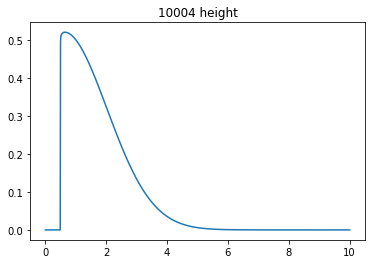

In [5]:
#Buru - Wichmann Catalog
#Pg 149 - "…Buru was reported merely the fact that an earthquake accompanied by a flood wave 
#had occurred, but without having caused damages."

#Historically for the time period, almost all of the settlements in Buru
#were on the south of Kayeli Bay where a Fort had been constructed in the early 1600s.
#Remains of this fort appear to be at [-3.384952, 127.114161].  We use the point
#[-3.3815, 127.115] which is seaward of the fort ruins.  NOTE: this is different than the previous
#coordinates which were on the south of the island.


city_name = 'PULAU BURU - Wichmann Catalog'
name = 10004  #
latitude = -3.3815
longitude = 127.113
distance = 0  # in kilometers (max 5) //TODO Not sure what this is??
kind = [None, 'chi', None]

# For kind = 'chi'
arrival_k = None # chi parameter
arrival_lower_bound = None # in meters
arrival_params = [arrival_k, arrival_lower_bound]
height_k = 1.01 # chi param
height_loc = 0.5 # in meters
height_scale = 1.5
height_params = [height_k, height_loc, height_scale]
inundation_k = None
inundation_lower_bound = None
inundation_params = [inundation_k, inundation_lower_bound]

beta = 0
n = .015

dists = dict()
dists['height'] = stats.chi(df=height_k,loc=height_loc,scale=height_scale)

gauge = Gauge(name,longitude,latitude,dists,beta,n,city_name)
gauges.append(gauge)
gauge.plot_all()
    
        
# height_upper_bound = 5      

# ## Don't edit code below this
# domain = np.linspace(0,height_upper_bound,100)
# plt.plot(domain, stats.chi(height_k,height_loc,height_scale).pdf(domain))
# plt.xlabel("wave height(meters)")
# plt.show()

# %matplotlib inline
# g.plot()


Justification:  this account does not give a wave height only that there was a wave. I ruled out all waves less than 1 meter because these would not have been not noticeable, and wouldn't have been classified as a 'flood' wave.  Recall that even in Buru the expected tide was quite low, so a 'flood' wave would need to be at least 1-1.5m to be noticeable. To not have caused destruction, I think the wave would have been relatively small, so I made it skewed to the left to favor small waves. I thought the largest reasonable wave that could not have caused any damage would be around 3.0 meters (1m above 'flood' tide). So I made a distribution that tapers quickly after this.


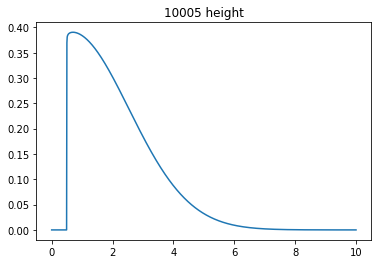

In [6]:
#Pulau Haruku (Hulaliu) - Wichmann Catalog
#tsunami seen at the town of Hulaliu (as well as Oma and Wasu which I can't find)
#
# location chosen as near the current boat dock which appears to be near a church like structure is given by -3.5435, 128.5575
# We choose a distribution very similar to that for Buru, except that in this case we allow for a longer tail
# to the right because there is no statement that there were 'no significant damages'


city_name = 'Hulaliu - Wichmann Catalog'
name = 10005  #
latitude = -3.543
longitude = 128.557
distance = 0  # in kilometers (max 5) //TODO Not sure what this is??
kind = [None, 'chi', None]

# For kind = 'chi2'
arrival_k = None # chi2 parameter
arrival_lower_bound = None # in meters
arrival_params = [arrival_k, arrival_lower_bound]
height_k = 1.01 # chi2 param
height_loc = 0.5 # in meters
height_scale = 2.0
height_params = [height_k, height_loc, height_scale]
inundation_k = None
inundation_lower_bound = None
inundation_params = [inundation_k, inundation_lower_bound]

beta = 0
n = .015

dists = dict()
dists['height'] = stats.chi(df=height_k,loc=height_loc,scale=height_scale)

gauge = Gauge(name,longitude,latitude,dists,beta,n,city_name)
gauges.append(gauge)
gauge.plot_all()
    
        
# height_upper_bound = 5      

# ## Don't edit code below this
# domain = np.linspace(0,height_upper_bound,100)
# plt.plot(domain, stats.chi(height_k,height_loc,height_scale).pdf(domain))
# plt.xlabel("wave height(meters)")
# plt.show()

# g.plot()

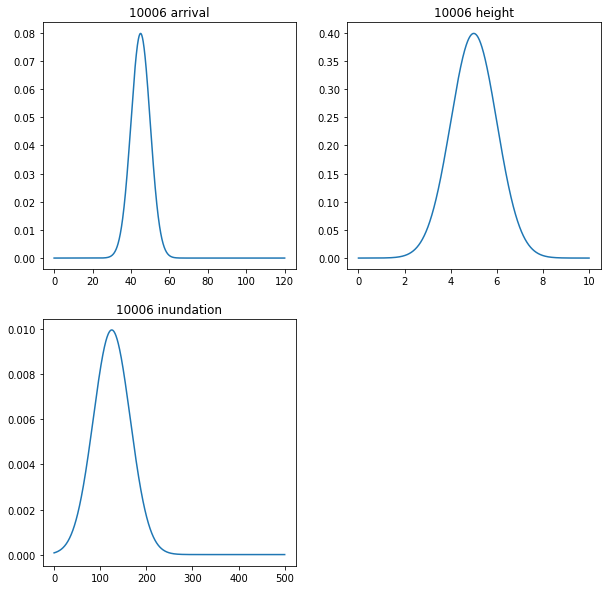

In [7]:
#Saparua - Wichmann Catalog
#Pg 149 - "a flood wave penetrated into the bay of Saparua four times 
#between 8:30 and 11 am and reached a height of 3m above the highest water level"

#I CHOSE BENTENG DURSTEDE'S SHORE, THE 17TH CENTURY DUTCH FORT, AS THE LOCATION FOR SAPARUA. 
#ITS COORDINATES ARE: [-3.57565, 128.659398]

city_name = 'Saparua - Wichmann Catalog'
name = 10006  #
latitude = -3.576
longitude = 128.657
distance = 0  # in kilometers (max 5) //TODO Not sure what this is??
kind = ['norm', 'norm', 'norm']
#kind = ['norm','norm',None]

# For kind = 'norm'
arrival_mean = 45  # in minutes
arrival_std = 5
arrival_params = [arrival_mean, arrival_std]
height_mean = 5  # in meters
height_std = 1.0
height_params = [height_mean, height_std]
inundation_mean = 125
inundation_std = 40
inundation_params = [inundation_mean, inundation_std]

# Load the beta angles for the shore elevation for inundtion priors for
# SUPARUA
ShoreAngles = ShoreAngle('suparua_profiles')
profiles_to_average = [4, 5, 8, 9, 10]
SUPARUA_average_angle = ShoreAngles.getAveragesSlopeAngles(profiles_to_average)
beta = SUPARUA_average_angle

n = .06

dists = dict()
dists['arrival'] = stats.norm(loc=arrival_mean,scale=arrival_std)
dists['height'] = stats.norm(loc=height_mean,scale=height_std)
dists['inundation'] = stats.norm(loc=inundation_mean,scale=inundation_std)

gauge = Gauge(name,longitude,latitude,dists,beta,n,city_name)
gauges.append(gauge)
gauge.plot_all()


# domain = np.linspace(0,10,100)
# distrb = stats.norm(height_mean,height_std)
# plt.plot(domain,distrb.pdf(domain))
# plt.xlabel("water height(meters)")
# plt.show()

# #Suparua - Wichmann
# #Pg 149 - “in the environs of the localities Saparua and Tijau it 
# #[the wave] thrust itself 405 feet inland”

# #I CHOSE BENTENG DURSTEDE'S SHORE, THE 17TH CENTURY DUTCH FORT, AS THE LOCATION FOR SAPARUA. 
# #ITS COORDINATES ARE: [-3.576063, 128.658715]

# #Feet
# # mean = 405
# # variance = 2 #feet squared
# # domain = np.linspace(390,420,1000)
# # distrb = stats.norm(mean,variance)
# # 
# # plt.plot(domain,distrb.pdf(domain))
# # plt.xlabel("Inundation (feet)")
# # plt.show()

# #Meters
# domain = np.linspace(80,160,100)
# distrb = stats.norm(inundation_mean,inundation_std)

# plt.plot(domain,distrb.pdf(domain))
# plt.xlabel("Inundation(meters)")
# plt.show()

# D_Pulau_Sap_Time = np.linspace(10,100,1000)
# Pulau_Sap_Time = stats.norm.pdf(D_Pulau_Sap_Time,arrival_mean,arrival_std)
# plt.plot(D_Pulau_Sap_Time,Pulau_Sap_Time)
# plt.show()

# g.plot()

Wave Height Justification: I chose the mean as 5m since the observation was 3m above the maximum water level which we are inferring from the tidal information is +2m. I chose the variance to be .75m because I thought it was sufficiently large to account for possible estimation error while excluding waves too small to be estimated as a 3m wave.

Inundation Justification: Because of how specific the measurement in the record was I left the mean at 405 ft. The variance is larger because of the variation in topography near Saparua.

INSERT DISTRIBUTION FOR LONTHOR - Pg 149 - Wichmann - "[THE WAVE REACHED] THE FOOT OF THE MOUNTAINS" HERE (Claire is working the elevation data for the western mountain.)

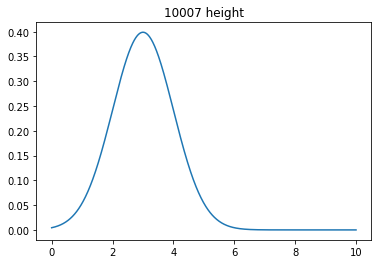

In [8]:
#Kulur (north coast of Pulau Saparua)...turned this gauge off because it was far to restrictive on the wave placement...not sure why
# 'weak flood' observed
# choose -3.501, 128.562 off the boat dock on the settlement on north-western edge of Palua Saparua
# We based this on a similar distribution to Amahai, but somewhat weaker

city_name = 'Kulur'
name = 10007  #
latitude = -3.502
longitude = 128.56
distance = 0  # in kilometers (max 5) //TODO Not sure what this is??
kind = [None, 'norm', None]


# For kind = 'skewnorm'
arrival_skew_param = None
arrival_mean = None  # in minutes
arrival_std = None
arrival_params = [arrival_skew_param, arrival_mean, arrival_std]
height_skew_param = None
height_mean = 3  # in meters
height_std = 1
height_params = [height_mean, height_std]
inundation_skew_param = None
inundation_mean = None  # in meters
inundation_std = None
inundation_params = [inundation_skew_param, inundation_mean, inundation_std]


n = .03

dists = dict()
dists['height'] = stats.norm(loc=height_mean,scale=height_std)

gauge = Gauge(name,longitude,latitude,dists,beta,n,city_name)
gauges.append(gauge)
gauge.plot_all()


# domain = np.linspace(0,6,1000)
# distrib = stats.norm(height_mean,height_std)
# plt.plot(domain,distrib.pdf(domain))
# plt.xlabel("wave height (meters)")
# plt.show()
# g.plot()

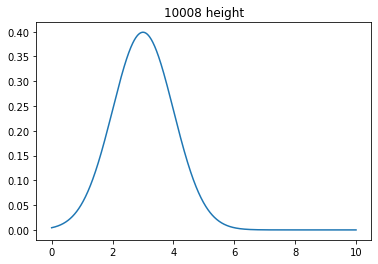

In [10]:
#Ameth (north east coast of Nusa Laut)
# 'flooding was noted'
# choose -3.6455, 128.807 off the boat dock on the settlement on north-eastern edge of Nusa Laut
# We based this on a similar distribution to Amahai, as the description is quite similar, but also less specific,
# so we go with a slightly weaker wave here.

city_name = 'Ameth'
name = 10008  #
latitude = -3.6455
longitude = 128.8065
distance = 0  # in kilometers (max 5) //TODO Not sure what this is??
kind = [None, 'norm', None]


# For kind = 'skewnorm'
arrival_skew_param = None
arrival_mean = None  # in minutes
arrival_std = None
arrival_params = [arrival_skew_param, arrival_mean, arrival_std]
#height_skew_param = None
height_mean = 3  # in meters
height_std = 1
height_params = [height_mean, height_std]
inundation_skew_param = None
inundation_mean = None  # in meters
inundation_std = None
inundation_params = [inundation_skew_param, inundation_mean, inundation_std]

n = .03

dists = dict()
dists['height'] = stats.norm(loc=height_mean,scale=height_std)

gauge = Gauge(name,longitude,latitude,dists,beta,n,city_name)
gauges.append(gauge)
gauge.plot_all()


# domain = np.linspace(0,6,1000)
# distrib = stats.norm(height_mean,height_std)
# plt.plot(domain,distrib.pdf(domain))
# plt.xlabel("wave height (meters)")
# plt.show()
# g.plot()

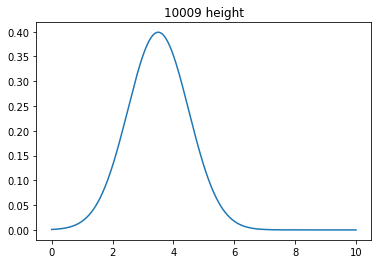

In [9]:
#Amahai
#Pg 243 alternate - "at Ceram Island at the settlements of Amahai and Wahai, the water flooded homes near the beach; many proas were washed away.

#Chose a position near the current bay in Amahai [-3.338, 128.921].  To flood homes, assumed this would be 1m above high flood tide

city_name = 'Amahai -- Russian version'
name = 10009  #
latitude = -3.338
longitude = 128.921
distance = 0  # in kilometers (max 5) //TODO Not sure what this is??
kind = [None, 'norm', None]


# For kind = 'skewnorm'
arrival_skew_param = None
arrival_mean = None  # in minutes
arrival_std = None
arrival_params = [arrival_skew_param, arrival_mean, arrival_std]
#height_skew_param = None
height_mean = 3.5  # in meters
height_std = 1
height_params = [height_mean, height_std]
inundation_skew_param = None
inundation_mean = None  # in meters
inundation_std = None
inundation_params = [inundation_skew_param, inundation_mean, inundation_std]


n = .03

dists = dict()
dists['height'] = stats.norm(loc=height_mean,scale=height_std)

gauge = Gauge(name,longitude,latitude,dists,beta,n,city_name)
gauges.append(gauge)
gauge.plot_all()


# domain = np.linspace(0,6,1000)
# distrib = stats.norm(height_mean,height_std)
# plt.plot(domain,distrib.pdf(domain))
# plt.xlabel("wave height (meters)")
# plt.show()
# g.plot()

Justification: To flood the homes, and wash proas (small fishing boats) away then we would need to have a wave well above the high tide level, so 3.5m seems reasonable. We don't anticipate a massive wave like that seen in Banda Neira however as the destruction likely would have been more extensive and likely documented better.

#Output gauges

In [12]:
#Output gauges
# print(gauges)
dump_gauges(gauges,'./InputData/gauges.json')

#Format FG Max File
f = open('./InputData/fgmax_grid.txt', 'w')
f.write('1.0000000000e+01            # tstart_max\n')
f.write('1.0000000000e+10            # tstart_max\n')
f.write('0.0000000000e+00            # dt_check\n')
f.write('6                           # min_level_check\n')
f.write('1.0000000000e-00            # arrival_tol\n')
f.write('0                           # point_style\n')
f.write(str(len(gauges)) + '         # npts\n')

for gauge in gauges:
    f.write(str(gauge.longitude) + '       ' + str(gauge.latitude) + '\n')

f.close()

In [12]:
# #Take a look at the Tohoku KDEs (use this cell to experiment with the transform and bandwidth)
# # transformType='none'
# # bw_method=0.25
# transformType='log'
# bw_method='silverman'

# from tohoku import makeTohokuKDEs
# heightKdes = makeTohokuKDEs(tohokuFile="../InputData/amplification_data.npy",transformType=transformType,bw_method=bw_method)
# heightKdes[0].plot()
# heightKdes[0].plot(plotRange=[0, 0.5, 0, 0.5])

In [13]:
# #Plot the Tohoku KDEs
# # transformType='log'
# # bw_method=4
# from tohoku import plotTohokuKDEs
# plotTohokuKDEs(tohokuFile="../InputData/amplification_data.npy",transformType=transformType,bw_method=bw_method)

# COMPUTE LIKELIHOODS #

In [14]:
#Choose KDE bandwidth and transform that you want to use
#Conditional distributions must have been precomputed by running the Tohoku notebook
transformType='log'
bw_method=0.75

folder=transformType+"_bw"+str(bw_method)

heightFile=folder+"/gaugeHeightLikelihood.npy"
inundationFile=folder+"/gaugeInundationLikelihood.npy"

In [15]:
# Build the Gauge likelihoods
# buildGaugeLikelihoods(gaugeFile="InputData/gauges.npy",
#                       condDistFilePrefix="condDist_",
#                       tohokuFile="../InputData/amplification_data.npy",
#                       heightFile="../InputData/gaugeHeightLikelihood.npy",
#                       inundationFile="../InputData/gaugeInundationLikelihood.npy")
buildGaugeLikelihoods(gaugeFile="InputData/gauges.npy",
                      condDistFilePrefix=folder+"/",
                      tohokuFile="../InputData/amplification_data.npy",
                      heightFile=heightFile,
                      inundationFile=inundationFile)

Loading gauges from InputData/gauges.npy
Building gauge likelihoods...
Gauge 0  (Height): Reading conditional distribution from log_bw0.75/condDist_ht_0.npz
Gauge 1  (Height): Reading conditional distribution from log_bw0.75/condDist_ht_0.npz
Gauge 2  (Height): Reading conditional distribution from log_bw0.75/condDist_ht_0.npz
Gauge 2  (Inundation): Reading conditional distribution from log_bw0.75/condDist_inun_b4.253_n0.060_0.npz


FileNotFoundError: [Errno 2] No such file or directory: 'log_bw0.75/condDist_inun_b4.253_n0.060_0.npz'

In [ ]:
# #Plot the gauge likelihoods
# plotGaugeLikelihoods()

# #Plot the conditional distributions
# def saveFigures(fileName,exts):
#     for ext in exts:
#         #plt.savefig(fileName+"."+ext)
#         plt.savefig(fileName+"."+ext, bbox_inches='tight')
#         print("saved: "+fileName+"."+ext)

# from glob import glob
# files = glob('condDist*.npy')
# exts = ["png"]

# for condDistFile in files:
#     c = np.load(condDistFile)
#     x = c[0,1:]
#     y = c[1:,0]
#     condDist = c[1:,1:]
    
#     xmax = 25.
#     ymax = 25.
#     condDist = condDist[y <= ymax, :]
#     condDist = condDist[:, x <= xmax]
#     x = x[x <= xmax]
#     y = y[y <= ymax]

#     X,Y = np.meshgrid(x,y)
#     plt.contourf(X, Y, condDist)
#     #plt.contourf(X, Y, np.log(condDist))

#     plt.xlabel('On shore')
#     plt.ylabel('Off shore')
#     plt.xlim(0.,xmax)
#     plt.ylim(0.,ymax)
#     plt.gca().set_aspect("equal")
#     plt.colorbar()
#     saveFigures(condDistFile.replace('.npy',''),exts)
#     plt.close()


In [ ]:
# def plotGaugeLikelihoods(inputFile,outputFile=None,xlabel="Offshore wave height (Geoclaw output)",xlim=None):
#     """ 

#     :param inputFile:
#     :param outputFile:
#     :return:
#     """
#     heightLikelihood = np.load(inputFile)
#     offShoreHeights = heightLikelihood[:,0]
#     heightLikelihood = heightLikelihood[:,1:]

#     fig, ax = plt.subplots()
#     for gid in range(heightLikelihood.shape[1]):
#         ax.plot(offShoreHeights,heightLikelihood[:,gid],label="Gauge "+str(gid))
#     if xlim is not None:
#         ax.set_xlim(xlim)
#     plt.xlabel(xlabel)
#     plt.ylabel("Likelihood")
#     plt.legend()

#     #print to file if one is specified
#     if outputFile is not None:
#         plt.savefig(outputFile)
#         plt.close()

In [ ]:
plotGaugeLikelihoods(heightFile,outputFile=folder+"/gauge_llh_ht.png")
plotGaugeLikelihoods(heightFile,xlim=[0,20],outputFile=folder+"/gauge_llh_ht_zoom.png")
plotGaugeLikelihoods(inundationFile,outputFile=folder+"/gauge_inun_ht.png")
plotGaugeLikelihoods(inundationFile,xlim=[0,20],outputFile=folder+"/gauge_inun_ht_zoom.png")

In [ ]:
from Gauge import from_json
from buildGaugeLikelihoods import plotGaugeCompare
plotGaugeCompare(heightFile,gauges=[from_json(gauge) for gauge in gauges],gtype=1,outputFolder=folder,xlim=[0,20])